In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# # Create a set of random latitude and longitude combinations.
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)

In [3]:
# # Add the latitudes and longitudes to a list.
# coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# # Create a list for holding the cities.
# cities = []
# # Identify the nearest city for each latitude and longitude combination.
# for coordinate in coordinates:
#     city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

#     # If the city is unique, then we will add it to the cities list.
#     if city not in cities:
#         cities.append(city)
# # Print the city count to confirm sufficient count.
# len(cities)

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
city_data_df = pd.read_csv("weather_data/cities.csv")
print(city_data_df)

     City_ID          City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          0    Georgetown   5.4112  100.3354     89.53        66          20   
1          1      Ambilobe -13.2000   49.0500     74.73        93         100   
2          2          Lasa  46.6166   10.7002     31.30        93          73   
3          3       Rikitea -23.1203 -134.9692     78.06        78         100   
4          4  Krasnyy Luch  48.1395   38.9371      5.18        97          74   
..       ...           ...      ...       ...       ...       ...         ...   
561      561        Dingle  10.9995  122.6711     85.41        64          68   
562      562    Port Keats -14.2500  129.5500     85.68        73          78   
563      563      Sobolevo  54.4299   31.8996     29.01        97         100   
564      564       Aguimes  27.9054  -15.4461     63.66        55           0   
565      565   Grand-Lahou   5.1367   -5.0242     74.25        87           1   

     Wind Speed Country    

In [18]:
# # Create an empty list to hold the weather data.
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

# # Loop through all the cities in the list.
# # enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1
    
# # Run an API request for each of the cities.
#     try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# # If an error is experienced, skip the city.
#     except:
#         print("City not found. Skipping...")
#         pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")    

In [19]:
# # Convert the array of dictionaries to a Pandas DataFrame.
# city_data_df = pd.DataFrame(city_data)
# city_data_df.head(10)

In [20]:
# #reorder the columns
# new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# reordered_city_data_df = city_data_df[new_column_order]
# reordered_city_data_df.head(10)

In [21]:
# # Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"

# # Export the City_Data into a CSV.
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

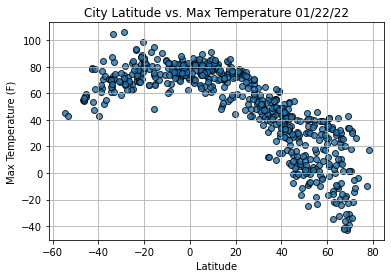

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

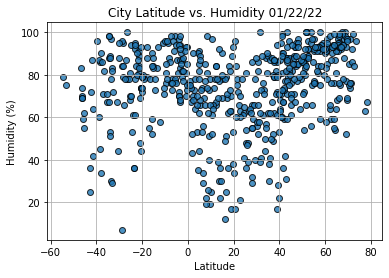

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

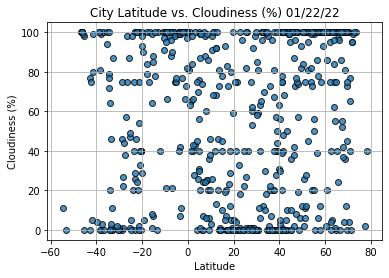

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

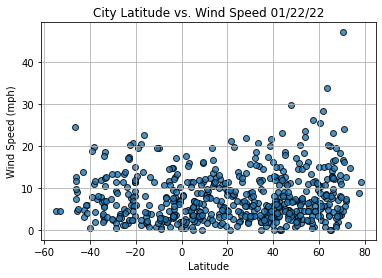

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                  Bongandanga
Lat                           1.5
Lng                         21.05
Max Temp                    69.08
Humidity                       67
Cloudiness                     65
Wind Speed                   0.51
Country                        CD
Date          2022-01-20 05:20:37
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
561     True
562    False
563     True
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Georgetown,5.4112,100.3354,89.53,66,20,6.91,MY,2022-01-20 05:20:33
2,2,Lasa,46.6166,10.7002,31.30,93,73,7.34,IT,2022-01-20 05:20:34
4,4,Krasnyy Luch,48.1395,38.9371,5.18,97,74,3.58,UA,2022-01-20 05:20:34
13,13,Bongandanga,1.5000,21.0500,69.08,67,65,0.51,CD,2022-01-20 05:20:37
16,16,Ca Mau,9.1769,105.1500,91.45,40,36,6.08,VN,2022-01-20 05:20:38


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [40]:
# import inspect
# inspect.signature(plot_linear_regression)

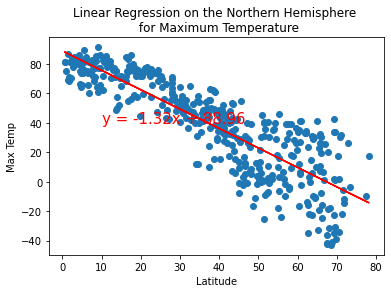

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

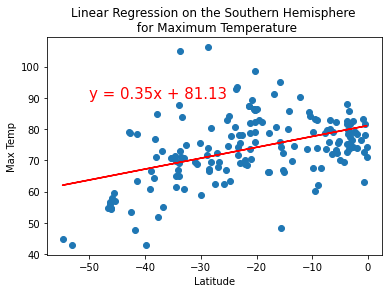

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

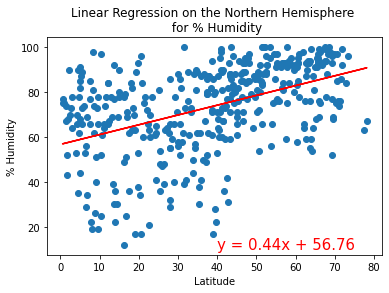

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

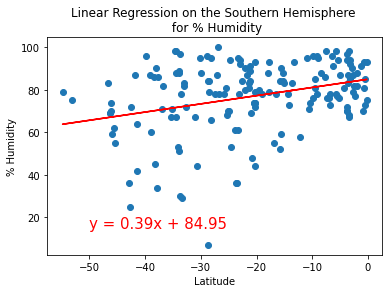

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

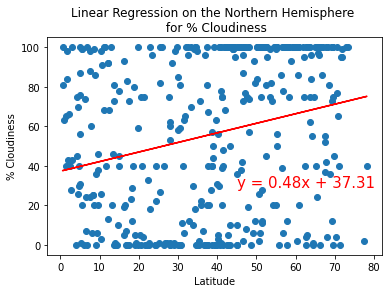

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,29))

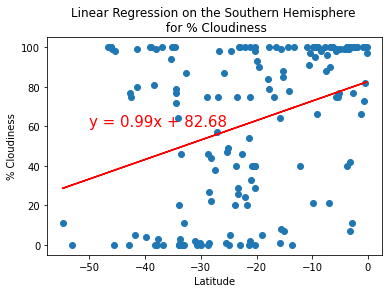

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

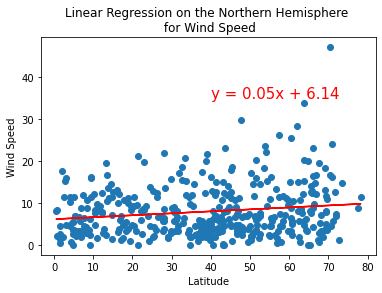

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

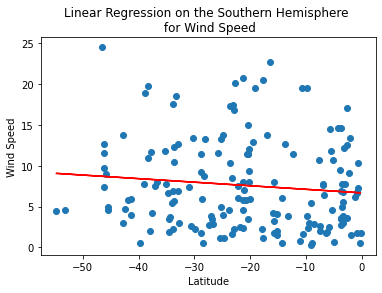

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [44]:
# # print rsquared value -- This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
# correlation_matrix = np.corrcoef(x_values, y_values)
# correlation_xy = correlation_matrix[0,1]
# r_squared = correlation_xy**2
# print(f"R-squared value for Wind Speed in Northern Hemisphere is {r_squared:.2F}.")